In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Introduction

The Google Play Store is the primary marketplace for applications on Android devices.  This data set provides information on nearly 10,000 apps available, including average user rating, castegory, approximate number of downloads and price.  Once broken down, this data can provide valuable information on how specific attributes of an app correlate to the app's perceived quality. 

# How Can We Measure Quality?

Before performing any analysis, we must first decide on a measurement of an app's perceived quality.  T|he two primary options are average rating and number of downloads.  Because of the way the data is presented, average rating provides a more quantitative measure of perceived quality.  The downloads counts provided are approximations, resulting in very noisy data.  The apps' aveerage ratings cluster around 4.2 with a standard deviation of .51 and a slight positive skew.  This will provide a reasonable baseline to measure various samples against.



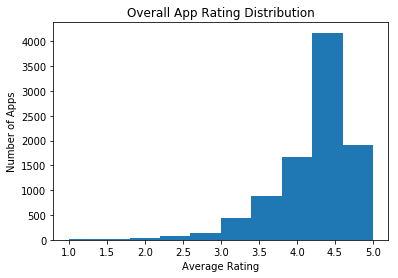

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [73]:
#import and process data, removing apps with less than 100 reviews or erroneous data (rating higher than 5)
#display overview of data
appdata = pd.read_csv('googleplaystore.csv')
newappdata = pd.DataFrame()
newappdata = appdata.loc[lambda df: appdata['Rating'] > 0, :]
newappdata = newappdata.loc[lambda df: newappdata['Rating'] < 5.1, :]
plt.hist(newappdata['Rating'])
plt.title('Overall App Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Number of Apps')
plt.show()
newappdata['Rating'].describe()

# How Are Price and Rating Correlated?

### Paid apps vs. Free Apps

count    8719.000000
mean        4.186203
std         0.512338
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64
count    647.000000
mean       4.266615
std        0.547523
min        1.000000
25%        4.100000
50%        4.400000
75%        4.600000
max        5.000000
Name: Rating, dtype: float64


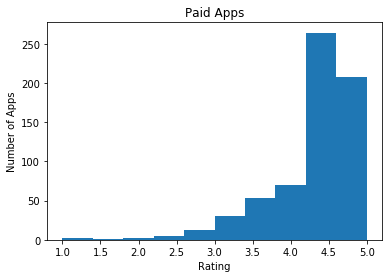

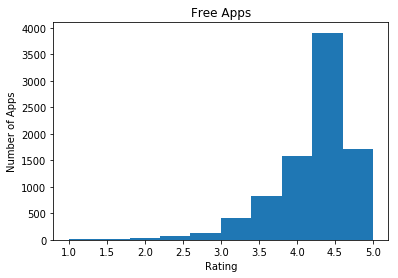

Ttest_indResult(statistic=3.8331695795790606, pvalue=0.00012733077427688148)

In [74]:
freedata = pd.DataFrame()
paiddata = pd.DataFrame()
freedata = newappdata.loc[lambda df: newappdata['Type'] == 'Free', :]
paiddata = newappdata.loc[lambda df: newappdata['Type'] == 'Paid', :]
print(freedata['Rating'].describe())
print(paiddata['Rating'].describe())
plt.hist(paiddata['Rating'])
plt.title('Paid Apps')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()
plt.hist(freedata['Rating'])
plt.title('Free Apps')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()
stats.ttest_ind(paiddata['Rating'], freedata['Rating'])

From histograms of the free app ratings and paid app ratings, we can see that the paid apps have more positive skew, clustering around 4.27, while the free apps more closely resemble the overall distribution.  This makes logical sense, paid apps tend to have larger budgets and higher production value than free ones and users may be more inclined to give a higher score to a product they invested money into.  This difference might be attributable to the larger sample size of free apps, but a t test indicates a reasonable difference between the two with a high probability of statistical significance.

### Price vs. Rating

c:\users\reid mccorkle\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


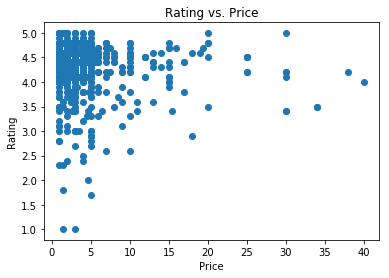

In [75]:
#create scatter plot of prices vs ratings
mylist = []
for x in paiddata['Price']:
    n = float(x[1:])
    mylist.append(n)
paiddata['Price'] = mylist
plt.scatter(paiddata.loc[lambda df: paiddata['Price'] < 50, 'Price'], paiddata.loc[lambda df: paiddata['Price'] < 50, 'Rating'])
plt.title('Rating vs. Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

Further evidence for this correlation is provided by plotting an apps price vs its rating.  a weak but relevant positive correlation exists between the two statistics.

# How Does an App's Category Correlate to Rating?

In [63]:
catdata = pd.DataFrame()
mean = []
std =[]
mean = newappdata.groupby(['Category']).mean()
std = newappdata.groupby(['Category']).std()
print(std)
print(mean)

                       Rating
Category                     
ART_AND_DESIGN       0.358297
AUTO_AND_VEHICLES    0.543692
BEAUTY               0.362603
BOOKS_AND_REFERENCE  0.429046
BUSINESS             0.624422
COMICS               0.537758
COMMUNICATION        0.426192
DATING               0.630510
EDUCATION            0.251894
ENTERTAINMENT        0.302556
EVENTS               0.419499
FAMILY               0.508026
FINANCE              0.642108
FOOD_AND_DRINK       0.548070
GAME                 0.365375
HEALTH_AND_FITNESS   0.617822
HOUSE_AND_HOME       0.368411
LIBRARIES_AND_DEMO   0.378522
LIFESTYLE            0.693907
MAPS_AND_NAVIGATION  0.519926
MEDICAL              0.663581
NEWS_AND_MAGAZINES   0.536707
PARENTING            0.517845
PERSONALIZATION      0.352732
PHOTOGRAPHY          0.462896
PRODUCTIVITY         0.504931
SHOPPING             0.404577
SOCIAL               0.413809
SPORTS               0.427857
TOOLS                0.616143
TRAVEL_AND_LOCAL     0.504691
VIDEO_PLAY

sorting the apps by category and displaying the means and standard deviations shows a few categories with below average scores and a few with above average scores.  Let's compare the two lowest scoring categories with the two highest scoreing categories

In [66]:
stats.ttest_ind(newappdata.loc[lambda df: newappdata['Category'] == 'DATING', 'Rating'], newappdata.loc[lambda df: newappdata['Category'] == 'ART_AND_DESIGN', 'Rating'])
stats.ttest_ind(newappdata.loc[lambda df: newappdata['Category'] == 'TOOLS', 'Rating'], newappdata.loc[lambda df: newappdata['Category'] == 'BOOKS_AND_REFERENCE', 'Rating'])

Ttest_indResult(statistic=-6.116112259944461, pvalue=1.422048519372099e-09)

The lowest scoring categories are dating and tools.  Dating apps are likely to be negatively perceived if the user is unable to find a suitable match.  Tools are likely to receive low scores if they don't work as advertised and from my experience, the play store contains lots of tool type apps that dont work very well.  Art/Design and book/Refernce type apps are easier to create and have a more narrow intended function, meaning they are more likely to function as advertised and generate higher scores.

# Conclusions
Strong correlations exist between the attributes I chose to focus on and an app's average rating in the Google Play Store.  While there isn't enough information to imply any causal relationship, this information provides a solid foundation for predicting an app's rating based on the information.

# Additional Research Proposal
As an additional research project, I'd like to come up with some simple algorithm to predict an app's rating based on several of the given attributes.  I would need to learn how those types of algorithms are written, although I would most likely use some sort of weighted average.  I would need to perform further and more detailed analyses of the data, I believe regression lines would be particularly useful, as well as some more practice processing data.  Some of the attributes were formatted in ways that gave me a hard time using them, particularly the number of ratings and number of downloads.
    